In [4]:
!git clone https://github.com/coick4698/garbage_classification.git

Cloning into 'garbage_classification'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 38 (delta 4), reused 21 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 10.43 KiB | 2.09 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/garbage_classification

import sys
sys.path.append('/content/garbage_classification/src')

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from dataset import get_dataloaders
from model import get_mobilenetv2, get_densenet121, get_squeezenet, get_shufflenetv2
from train import train_model
from utils import plot_accuracy, plot_confusion_matrix

# 데이터 경로 고정
data_path = '/content/drive/MyDrive/iss_project/garbage_classification'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/garbage_classification


In [15]:
import os
os.makedirs("results/checkpoints", exist_ok=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 0.7397, Val Acc: 67.88%
Epoch [2/10] Train Acc: 0.8384, Val Acc: 85.81%
Epoch [3/10] Train Acc: 0.8709, Val Acc: 84.92%
Epoch [4/10] Train Acc: 0.8935, Val Acc: 86.16%
Epoch [5/10] Train Acc: 0.9223, Val Acc: 87.01%
Epoch [6/10] Train Acc: 0.9306, Val Acc: 88.26%
Epoch [7/10] Train Acc: 0.9356, Val Acc: 81.97%
Epoch [8/10] Train Acc: 0.9432, Val Acc: 89.31%
Epoch [9/10] Train Acc: 0.9444, Val Acc: 89.21%
Epoch [10/10] Train Acc: 0.9473, Val Acc: 90.81%


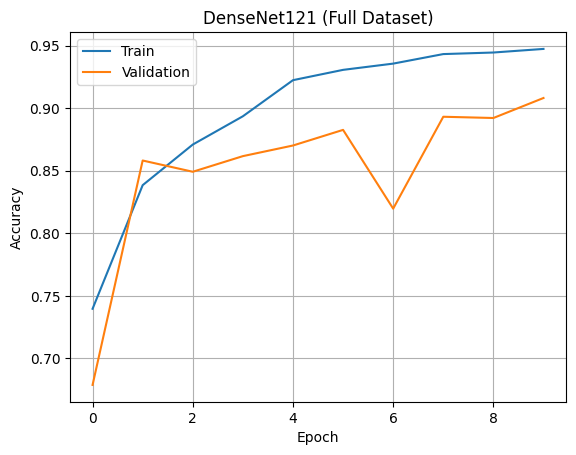

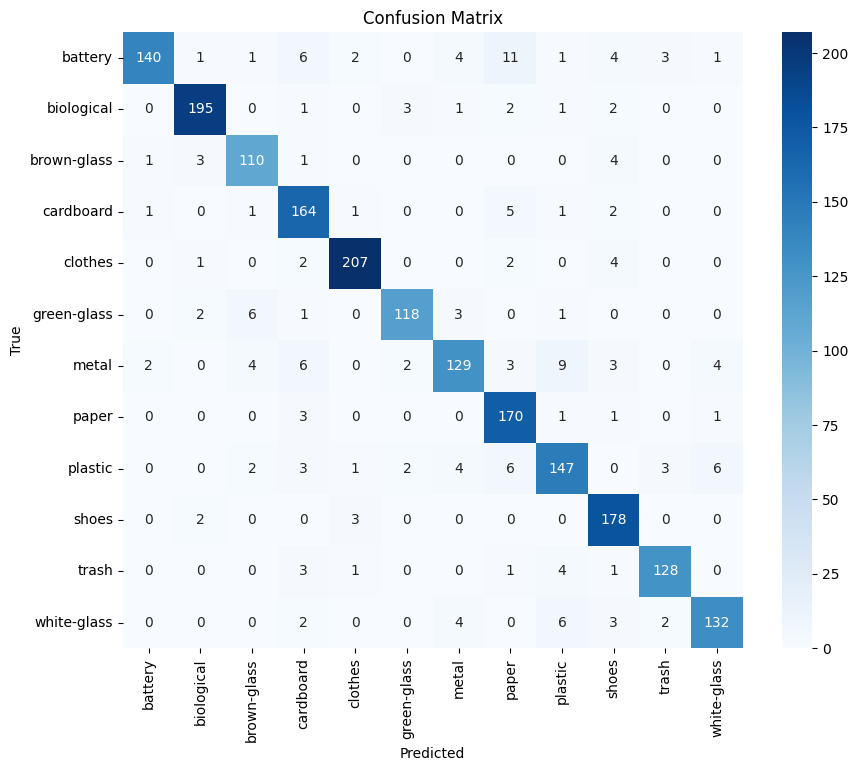

In [16]:
# DenseNet121 - Full dataset
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_densenet121(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="DenseNet121 (Full Dataset)")
plot_confusion_matrix(model, val_loader, class_names, device=device)

torch.save(model.state_dict(), "results/checkpoints/densenet121_full_epoch10.pth")
